<a href="https://colab.research.google.com/github/mauricifu2001-code/Humidity_prediction_linearregression/blob/main/Regresi%C3%B3n_Lineal_(Eliminando_Datos)_MEJORADO_(YO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion lineal simple-Eliminando Datos-Mejorado

# Cargar datos

In [ ]:
import pandas as pd5
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Campoalegre_2015-2022.csv",delimiter=';',skiprows=0)
df.head()

,Temp1,Temp2,Hum,Rain
0,21.1,20.4,94,0.0
1,20.4,20.0,95,0.0
2,21.4,19.8,95,0.0
3,24.9,21.4,82,0.0
4,26.9,24.9,71,0.0


In [ ]:
df.describe()

,Temp1,Temp2,Hum,Rain
count,63436.000000,63436.000000,63436.000000,63436.000000
mean,25.140137,24.173627,67.970112,0.175928
std,8.399085,8.115721,26.794865,3.228622
min,0.000000,0.000000,0.000000,0.000000
25%,23.300000,22.700000,58.000000,0.000000
50%,25.700000,24.700000,74.000000,0.000000
75%,29.500000,28.100000,88.000000,0.000000
max,67.800000,67.800000,100.000000,279.200000


Temp1 = temperatura estacion Profesional; Temp2 = Temperatura estacion propia


# Eliminacion de filas que contengan ceros "0"

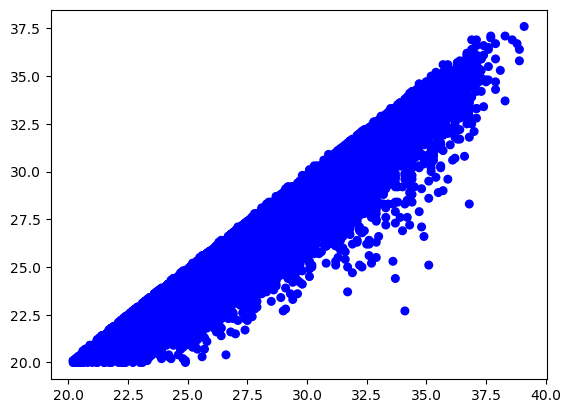

In [ ]:

filtered_df = df[(df['Temp1'] >= 20) & (df['Temp1'] <= 40) & (df['Temp2'] >= 20) & (df['Temp2'] <= 40) & (df['Hum'] >= 35)]

colores=['orange','blue']
tamanios=[30,60]

Temp1 = filtered_df['Temp1'].values
Temp2 = filtered_df['Temp2'].values
Hum = filtered_df['Hum'].values



asignar=[]
for index, row in filtered_df.iterrows():
    if(row['Temp1']>50):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(Temp1, Temp2, c=asignar, s=tamanios[0])
plt.show()

In [ ]:
print(Temp1.shape,",",Temp2.shape,",",Hum.shape)

(55771,) , (55771,) , (55771,)


In [ ]:
import pandas as pd

datos = {
    'Temp1' : Temp1,
    'Temp2': Temp2,
    'Hum': Hum
}

df2 = pd.DataFrame(datos)

print(df2.shape)
df2

(55771, 3)


,Temp1,Temp2,Hum
0,21.1,20.4,94
1,20.4,20.0,95
2,24.9,21.4,82
3,26.9,24.9,71
4,30.6,30.2,60
...,...,...,...
55766,28.6,26.6,73
55767,29.1,28.4,72
55768,29.7,28.8,69
55769,32.1,29.2,66


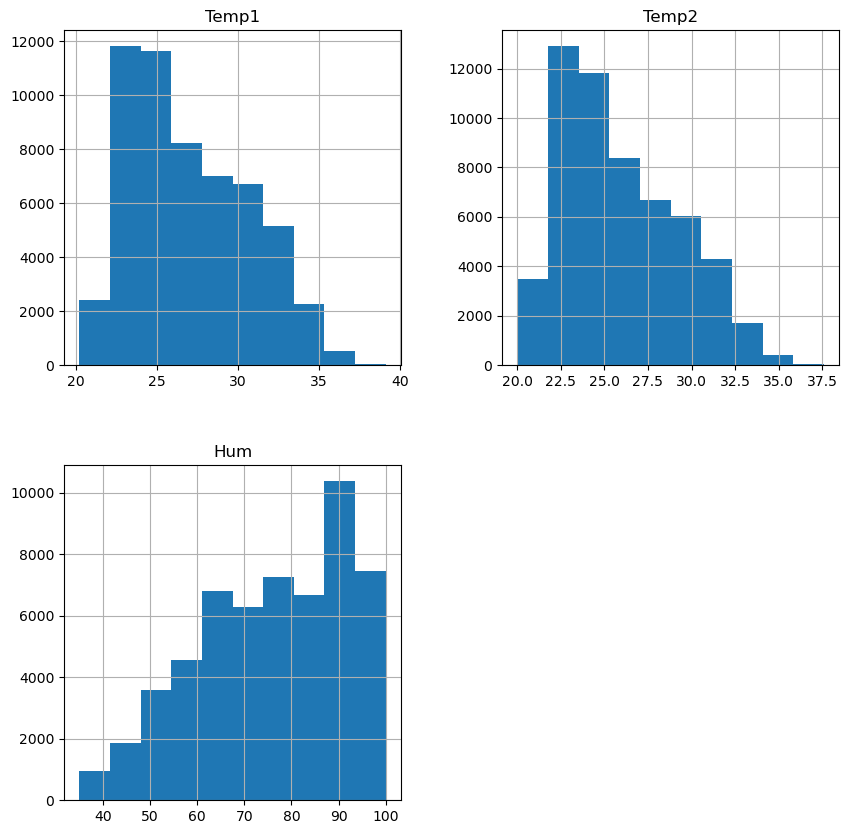

In [ ]:
plot1 = df2.hist(figsize=[10,10])

# Seleccion de variables

ValueError: x and y must have same first dimension, but have shapes (24,) and (58069,)

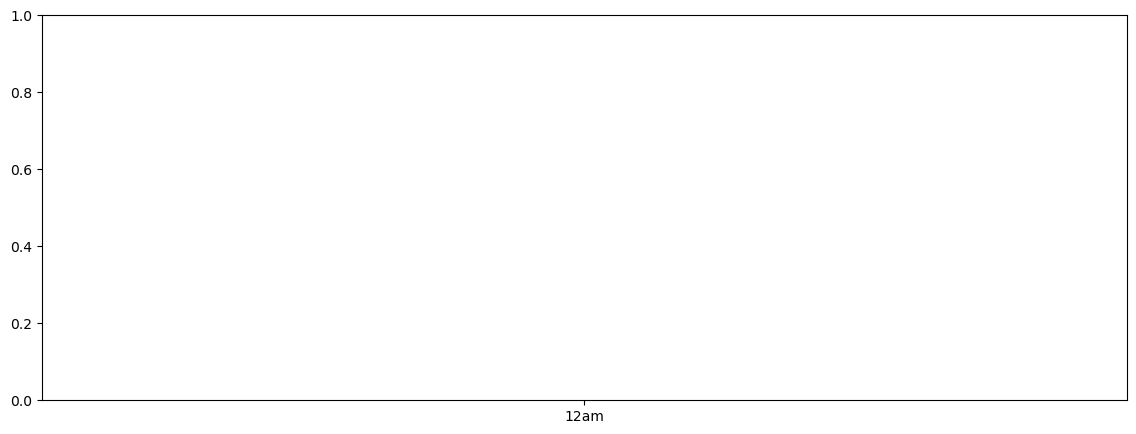

In [ ]:
fig, ax = plt.subplots(figsize = (14, 5))

x = df.iloc[:,0]
y = df.iloc[:,2]

Horas = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']
datos = {'Temperature °C':x, 'Humidity %':y}
ax.plot(Horas,datos['Temperature °C'], label = 'Temperature °C', color = 'tab:red',marker = '',linewidth=6)
ax.plot(Horas,datos['Humidity %'], label = 'Humidity %', color = 'tab:blue',marker = '',linewidth=6)
ax.legend(loc = 'center right',fontsize=12)
ax.set_title('Comparison of temperature and humidity', loc = "center", fontdict = {'fontsize':18, 'fontweight':'bold'})

plt.show()


In [ ]:
plt.savefig("Comparación_Temp_Hum.png")

<Figure size 640x480 with 0 Axes>

<AxesSubplot:xlabel='Temp1', ylabel='Hum'>

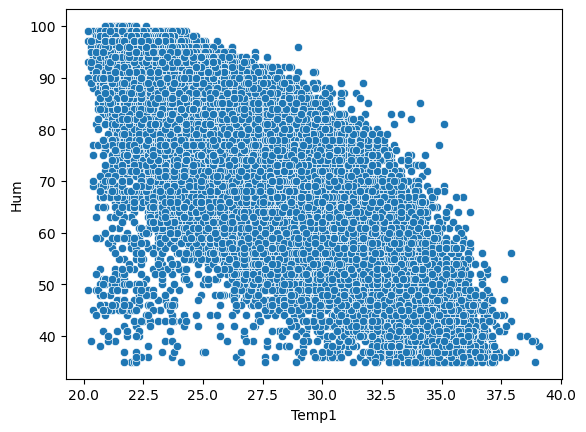

In [ ]:
sns.scatterplot(x='Temp1', y='Hum', data=df2)
                                           # Se quiere relacionar los grados de alcohol de las personas en los
                                                # accidentes con el numero total de accidentes de autos.

# Modelo de Regresion Lineal

In [ ]:
explicativas = df2[['Temp1']]   # el grado de alcohol explica el total de accidentes.

In [ ]:
objetivo = df2[['Hum']]   # se toma como objetivo los accidentes de autos en total

In [ ]:
from sklearn.linear_model import LinearRegression # Se importa la libreria a usar para generar el modelo de regresion

In [ ]:
model = LinearRegression()  # se guarda el modelo de regresion lineal en la variable "model"

In [ ]:
type(model)  # se mira que tipo de variable es "model"

sklearn.linear_model._base.LinearRegression

In [ ]:
model.fit(X=explicativas, y=objetivo)  # se crea el modelo de regresion lineal con su x y y ("y" es el objetivo)

LinearRegression()

In [ ]:
model.__dict__  # miramos los parametros del modelo. tenemos en cuenta "intercept_" y "coef_"

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([[-3.45657798]]),
 '_residues': array([4713170.08897674]),
 'rank_': 1,
 'singular_': array([862.10233001]),
 'intercept_': array([168.75291817])}

In [ ]:
#import statsmodels.api as sm

In [ ]:
#fit linear regression model
#model = sm.OLS(objetivo,explicativas).fit()

In [ ]:
#view model summary
#print(model.summary())

$$
total = 111.63 - 1.39 \cdot temperatura_estacion
$$


conclusion = entre aumente un grado de la temperatura, la humedad decrece 1.39%


# Realizar predicciones

In [ ]:
model.predict(X=[[30]])  # Se hace la prediccion de que con 30 grados centigrados, la humedad sera 104

array([[65.0555787]])

In [ ]:
y_pred = model.predict(X=df2[['Temp1']])  # se igresan los valores de la variable alcohol de la base de datos para
                                        # general su modelo de prediccion y lo guardamos en la variable "y_pred"
print(y_pred)
y_pred.shape

[[95.81912274]
 [98.23872733]
 [82.68412641]
 ...
 [66.09255209]
 [57.79676494]
 [57.45110714]]


(55771, 1)

In [ ]:
df2.insert(3, 'pred', y_pred)  # adicionamos las predicciones de cada total en la base de datos para comparar
                            # la diferencia entre la prediccion y la realidad.

In [ ]:
df2.head()

,Temp1,Temp2,Hum,pred
0,21.1,20.4,94,95.819123
1,20.4,20.0,95,98.238727
2,24.9,21.4,82,82.684126
3,26.9,24.9,71,75.770970
4,30.6,30.2,60,62.981632


<AxesSubplot:xlabel='Temp1', ylabel='Hum'>

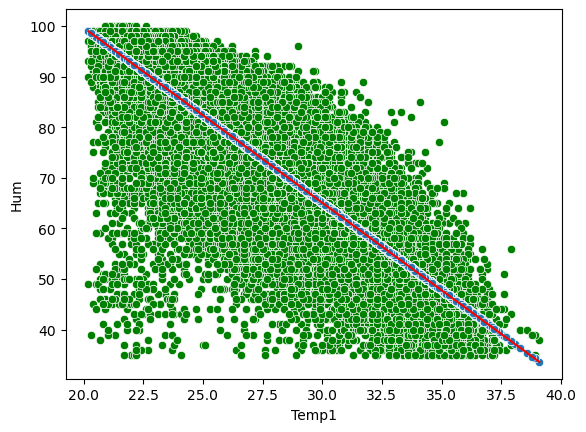

In [ ]:
sns.scatterplot(x='Temp1', y='Hum', data=df2, color='green')
sns.scatterplot(x='Temp1', y='pred', data=df2)
sns.lineplot(x='Temp1', y='pred', data=df2, color='red')   # graficamos los resultados.

# Bondad de ajuste

In [ ]:
model.score(X=explicativas, y=objetivo)  # para saber que tan bueno es nuestro modelo de prediccion.

0.6532678868290251

Nuestro modelo explica un 81% de la variabilidad original del total de accidentes  # conclusion